In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

### Load the interactions summary from Human Promoter Analysis

In [2]:
#df = pd.read_csv('DFIM_Arabidopsis_experiment_v10/Interactions_1000_v10/interactions_summary_attnLimit-0.txt',sep='\t')

#with 5000 examples
df = pd.read_csv('DFIM_Arabidopsis_experiment_v10/Interactions/interactions_summary_attnLimit-0.txt',sep='\t')

#with 1000 examples but using the same test indices as ATTN model
#df = pd.read_csv('DFIM_Arabidopsis_experiment_v10_ATTN-model/Interactions/interactions_summary_attnLimit-0.txt',sep='\t')


In [3]:
df.shape

(6670, 12)

In [4]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter0<-->filter2,1,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,MYB_tnt.ATY19_col_a_m1,0.000446,217.0,134.0,435.0,366.0,0.997020,1.000000
1,filter0<-->filter4,3,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,WRKY_tnt.WRKY6_col_a_m1,0.004362,117.0,403.0,1493.0,1024.0,0.740608,0.965583
2,filter0<-->filter5,4,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,G2like_tnt.AT2G40260_colamp_a_m1,0.007078,182.0,112.0,1214.0,1397.0,0.004998,0.015859
3,filter0<-->filter6,5,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,MYB_tnt.MYB51_col_a_m1,0.008758,75.0,67.0,1368.0,817.0,0.000064,0.000337
4,filter0<-->filter8,7,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT2G33550_col_a_m1,0.007580,148.0,41.0,1134.0,869.0,0.000005,0.000034


##### keep significant interactions

In [5]:
df = df[df['adjusted_pval']<0.05]
#df = df[df['pval']<0.05]

In [6]:
df.shape

(2369, 12)

In [7]:
#df = df[(df['motif1_qval'] < 0.01) & (df['motif2_qval']<0.01)]

In [8]:
df.shape

(2369, 12)

### Get TF-TF interactions

In [9]:
df['TF_interaction'] = df.apply(lambda x: x['motif1']+r'$\longleftrightarrow$'+x['motif2'], axis=1)

In [10]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction
2,filter0<-->filter5,4,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,G2like_tnt.AT2G40260_colamp_a_m1,0.007078,182.0,112.0,1214.0,1397.0,0.004998,0.015859,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...
3,filter0<-->filter6,5,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,MYB_tnt.MYB51_col_a_m1,0.008758,75.0,67.0,1368.0,817.0,0.000064,0.000337,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...
4,filter0<-->filter8,7,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT2G33550_col_a_m1,0.007580,148.0,41.0,1134.0,869.0,0.000005,0.000034,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...
7,filter0<-->filter13,12,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,WRKY_tnt.WRKY6_col_a_m1,0.042814,197.0,421.0,1394.0,1277.0,0.000457,0.001935,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...
13,filter0<-->filter21,20,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT1G76880_col_a_m1,0.000441,77.0,268.0,1568.0,1489.0,0.001661,0.006054,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...


In [11]:
df = df[df['motif1']!=df['motif2']]

In [12]:
df = df.reset_index()
df.shape

(2228, 14)

In [13]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['motif1'][i]
    TF2 = df['motif2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### Distribution of mean distance of interaction

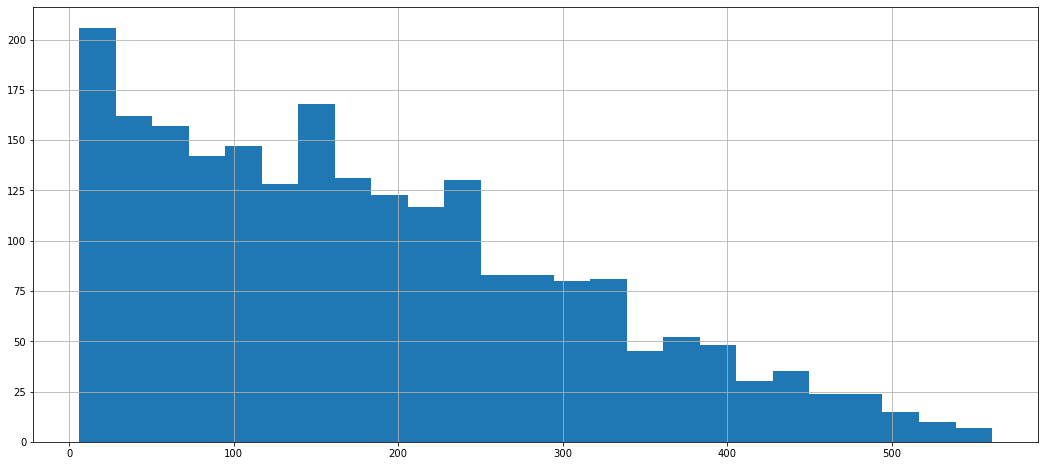

In [14]:
df['mean_distance'].hist(bins=25, figsize=(18,8))

In [15]:
df['mean_distance'].mean(),df['mean_distance'].median()

(183.2333931777379, 162.0)

### Most Frequent TF Family Interactions

In [16]:
df['TF_A_Family'] = df['motif1'].apply(lambda x: x.split('_')[0])
df['TF_B_Family'] = df['motif2'].apply(lambda x: x.split('_')[0])

In [17]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction,TF_A_Family,TF_B_Family
0,2,filter0<-->filter5,4,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,G2like_tnt.AT2G40260_colamp_a_m1,0.007078,182.0,112.0,1214.0,1397.0,0.004998,0.015859,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,G2like
1,3,filter0<-->filter6,5,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,MYB_tnt.MYB51_col_a_m1,0.008758,75.0,67.0,1368.0,817.0,0.000064,0.000337,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,MYB
2,4,filter0<-->filter8,7,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT2G33550_col_a_m1,0.007580,148.0,41.0,1134.0,869.0,0.000005,0.000034,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,Trihelix
3,7,filter0<-->filter13,12,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,WRKY_tnt.WRKY6_col_a_m1,0.042814,197.0,421.0,1394.0,1277.0,0.000457,0.001935,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,WRKY
4,13,filter0<-->filter21,20,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT1G76880_col_a_m1,0.000441,77.0,268.0,1568.0,1489.0,0.001661,0.006054,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,Trihelix
5,22,filter0<-->filter38,37,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT2G33550_col_a_m1,0.032039,308.0,178.0,1385.0,1055.0,0.010791,0.030920,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,Trihelix
6,40,filter0<-->filter67,66,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,MYBrelated_tnt.AT1G72740_colamp_a_m1,0.001703,116.0,100.0,744.0,539.0,0.004566,0.014656,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,MYBrelated
7,52,filter0<-->filter94,93,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,AP2EREBP_tnt.ERF7_colamp_a_m1,0.000073,147.0,20.0,1680.0,917.0,0.000202,0.000939,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,AP2EREBP
8,53,filter0<-->filter95,94,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,G2like_tnt.AT2G40260_colamp_a_m1,0.005079,190.0,208.0,1442.0,1398.0,0.008682,0.025604,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,G2like
9,55,filter0<-->filter98,97,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,C2C2dof_tnt.AT1G69570_col_a_m1,0.003103,305.0,130.0,1412.0,826.0,0.002613,0.008948,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,C2C2dof


In [18]:
df['Family_Interaction'] = df.apply(lambda x: x['TF_A_Family']+r'$\longleftrightarrow$'+x['TF_B_Family'],axis=1)

In [19]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF_A_Family'][i]
    TF2 = df['TF_B_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [20]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction,TF_A_Family,TF_B_Family,Family_Interaction
0,2,filter0<-->filter5,4,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,G2like_tnt.AT2G40260_colamp_a_m1,0.007078,182.0,112.0,1214.0,1397.0,0.004998,0.015859,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,G2like,AP2EREBP$\longleftrightarrow$G2like
1,3,filter0<-->filter6,5,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,MYB_tnt.MYB51_col_a_m1,0.008758,75.0,67.0,1368.0,817.0,0.000064,0.000337,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,MYB,AP2EREBP$\longleftrightarrow$MYB
2,4,filter0<-->filter8,7,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT2G33550_col_a_m1,0.007580,148.0,41.0,1134.0,869.0,0.000005,0.000034,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,Trihelix,AP2EREBP$\longleftrightarrow$Trihelix
3,7,filter0<-->filter13,12,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,WRKY_tnt.WRKY6_col_a_m1,0.042814,197.0,421.0,1394.0,1277.0,0.000457,0.001935,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,WRKY,AP2EREBP$\longleftrightarrow$WRKY
4,13,filter0<-->filter21,20,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT1G76880_col_a_m1,0.000441,77.0,268.0,1568.0,1489.0,0.001661,0.006054,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,Trihelix,AP2EREBP$\longleftrightarrow$Trihelix


In [21]:
df.shape

(2228, 17)

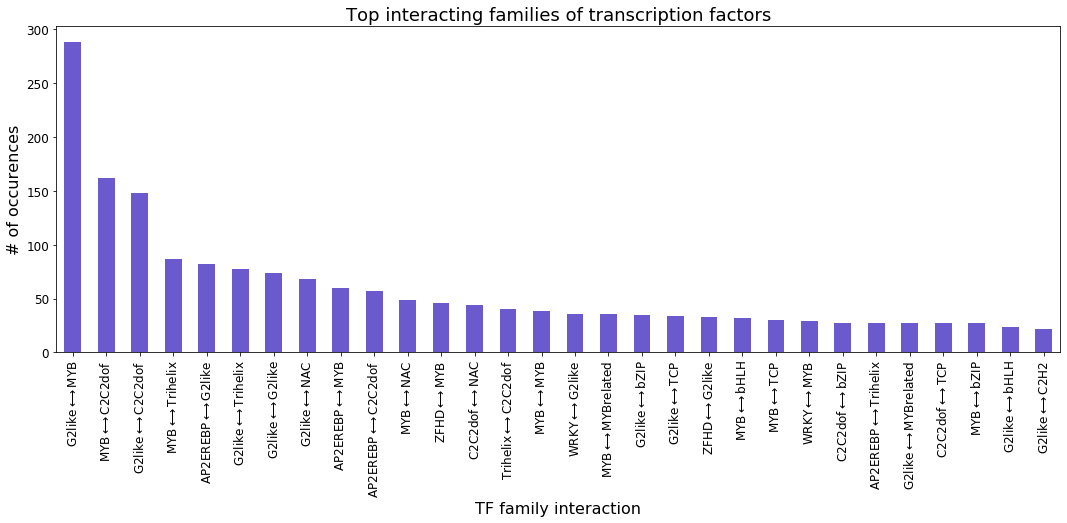

In [22]:
ax = df['Family_Interaction'].value_counts()[:30].plot(kind='bar',color='slateblue',figsize=(18,6),fontsize=12)
ax.set_xlabel("TF family interaction",fontsize=16)
ax.set_ylabel("# of occurences",fontsize=16)
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Top interacting families of transcription factors',fontsize=18)
plt.savefig('DFIM_Family_interactions_Arabidopsis.pdf',bbox_inches='tight')

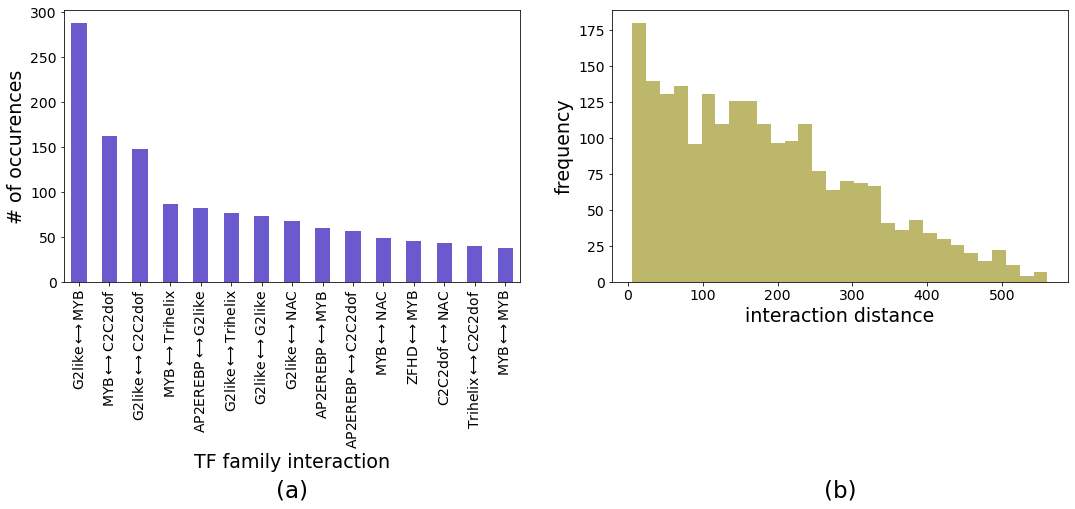

In [23]:
fig, axes = plt.subplots(1, 2)
#ax1 = df['TF_interaction'].value_counts()[:20].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=12,ax=axes[0])
#ax1.set_xlabel("motif interaction",fontsize=16)
#ax1.set_ylabel("# of occurences",fontsize=16)
#ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Most frequent interactions',fontsize=16)
ax1 = df['Family_Interaction'].value_counts()[:15].plot(kind='bar',color='slateblue',figsize=(18,6),fontsize=14,ax=axes[0])
ax1.set_xlabel("TF family interaction",fontsize=19)
ax1.set_ylabel("# of occurences",fontsize=19)
ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Top interacting families of transcription factors',fontsize=18)


ax2 = df['mean_distance'].plot(kind='hist',bins=30, figsize=(18,5),color='darkkhaki',fontsize=14,ax=axes[1])
ax2.set_xlabel("interaction distance",fontsize=19)
ax2.set_ylabel("frequency",fontsize=19)
ax2.xaxis.set_tick_params(rotation=0)
#ax2.set_title('Distribution of motif interaction distances',fontsize=18)

ax1.text(0.5,-0.79, "(a)", size=23, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.79, "(b)", size=23, ha="center", 
         transform=ax2.transAxes)
#df_list[count].plot(ax=axes[1,1])
plt.savefig('DFIM_Arabidopsis.pdf',bbox_inches='tight')

In [24]:
len(df['TF_interaction'].value_counts()),np.median(df['TF_interaction'].value_counts())

(459, 2.0)

In [25]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction,TF_A_Family,TF_B_Family,Family_Interaction
0,2,filter0<-->filter5,4,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,G2like_tnt.AT2G40260_colamp_a_m1,0.007078,182.0,112.0,1214.0,1397.0,0.004998,0.015859,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,G2like,AP2EREBP$\longleftrightarrow$G2like
1,3,filter0<-->filter6,5,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,MYB_tnt.MYB51_col_a_m1,0.008758,75.0,67.0,1368.0,817.0,0.000064,0.000337,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,MYB,AP2EREBP$\longleftrightarrow$MYB
2,4,filter0<-->filter8,7,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT2G33550_col_a_m1,0.007580,148.0,41.0,1134.0,869.0,0.000005,0.000034,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,Trihelix,AP2EREBP$\longleftrightarrow$Trihelix
3,7,filter0<-->filter13,12,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,WRKY_tnt.WRKY6_col_a_m1,0.042814,197.0,421.0,1394.0,1277.0,0.000457,0.001935,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,WRKY,AP2EREBP$\longleftrightarrow$WRKY
4,13,filter0<-->filter21,20,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT1G76880_col_a_m1,0.000441,77.0,268.0,1568.0,1489.0,0.001661,0.006054,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,Trihelix,AP2EREBP$\longleftrightarrow$Trihelix


In [26]:
df['motifsOnlyInt'] = df['motif1']+':'+df['motif2']
df['familyOnlyInt'] = df['TF_A_Family']+':'+df['TF_B_Family']
df.to_csv('DFIM_Arabidoposis_Final.txt',sep='\t')

In [27]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction,TF_A_Family,TF_B_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt
0,2,filter0<-->filter5,4,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,G2like_tnt.AT2G40260_colamp_a_m1,0.007078,182.0,112.0,1214.0,1397.0,0.004998,0.015859,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,G2like,AP2EREBP$\longleftrightarrow$G2like,AP2EREBP_tnt.DEAR5_col_a_m1:G2like_tnt.AT2G402...,AP2EREBP:G2like
1,3,filter0<-->filter6,5,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,MYB_tnt.MYB51_col_a_m1,0.008758,75.0,67.0,1368.0,817.0,0.000064,0.000337,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,MYB,AP2EREBP$\longleftrightarrow$MYB,AP2EREBP_tnt.DEAR5_col_a_m1:MYB_tnt.MYB51_col_...,AP2EREBP:MYB
2,4,filter0<-->filter8,7,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT2G33550_col_a_m1,0.007580,148.0,41.0,1134.0,869.0,0.000005,0.000034,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,Trihelix,AP2EREBP$\longleftrightarrow$Trihelix,AP2EREBP_tnt.DEAR5_col_a_m1:Trihelix_tnt.AT2G3...,AP2EREBP:Trihelix
3,7,filter0<-->filter13,12,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,WRKY_tnt.WRKY6_col_a_m1,0.042814,197.0,421.0,1394.0,1277.0,0.000457,0.001935,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,WRKY,AP2EREBP$\longleftrightarrow$WRKY,AP2EREBP_tnt.DEAR5_col_a_m1:WRKY_tnt.WRKY6_col...,AP2EREBP:WRKY
4,13,filter0<-->filter21,20,AP2EREBP_tnt.DEAR5_col_a_m1,0.02189,Trihelix_tnt.AT1G76880_col_a_m1,0.000441,77.0,268.0,1568.0,1489.0,0.001661,0.006054,AP2EREBP_tnt.DEAR5_col_a_m1$\longleftrightarro...,AP2EREBP,Trihelix,AP2EREBP$\longleftrightarrow$Trihelix,AP2EREBP_tnt.DEAR5_col_a_m1:Trihelix_tnt.AT1G7...,AP2EREBP:Trihelix
